# Analyse COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
run ./COVID_fetch_data.ipynb

remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Total 128 (delta 99), reused 99 (delta 99), pack-reused 29
Receiving objects: 100% (128/128), 954.40 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (107/107), completed with 27 local objects.
From https://github.com/CSSEGISandData/COVID-19
 * branch            master     -> FETCH_HEAD
   865c933..130954a  master     -> origin/master
Updating 865c933..130954a
Fast-forward
 csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv   | 7141 ++++++++++----------
 .../csse_covid_19_daily_reports/03-21-2020.csv     |  610 +-
 .../csse_covid_19_daily_reports/03-22-2020.csv     |    2 +-
 .../csse_covid_19_daily_reports/03-28-2020.csv     | 6862 +++++++++----------
 .../csse_covid_19_daily_reports/03-29-2020.csv     | 6870 +++++++++----------
 .../csse_covid_19_daily_reports/03-30-2020.csv     | 6880 +++++++++----------
 .../csse_covid_19_daily_reports/04-02-2020.csv     | 5140 +++++++-------
 .../csse_covid_19

## Fetching calculated data

In [3]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [4]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
0.0,Afghanistan,2020-01-22,0.0,0.0,38928.341,59.627395,652860.0,0.0,0.0,2020-04-01,2020-04-06,-70.0,-75.0
1.0,Afghanistan,2020-01-23,0.0,0.0,38928.341,59.627395,652860.0,0.0,0.0,2020-04-01,2020-04-06,-69.0,-74.0
2.0,Afghanistan,2020-01-24,0.0,0.0,38928.341,59.627395,652860.0,0.0,0.0,2020-04-01,2020-04-06,-68.0,-73.0
3.0,Afghanistan,2020-01-25,0.0,0.0,38928.341,59.627395,652860.0,0.0,0.0,2020-04-01,2020-04-06,-67.0,-72.0
4.0,Afghanistan,2020-01-26,0.0,0.0,38928.341,59.627395,652860.0,0.0,0.0,2020-04-01,2020-04-06,-66.0,-71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN
NaN,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-02,NaN,NaN
NaN,Diamond Princess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN
NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-25,NaN,NaN


## Filtering the countries

In [5]:
filtered_countries = ['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Netherlands']

In [6]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

# Dynamics

In [7]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [8]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [9]:
df_dynamics_plot = df_dynamics_t.loc[range(-5,50),filtered_countries]

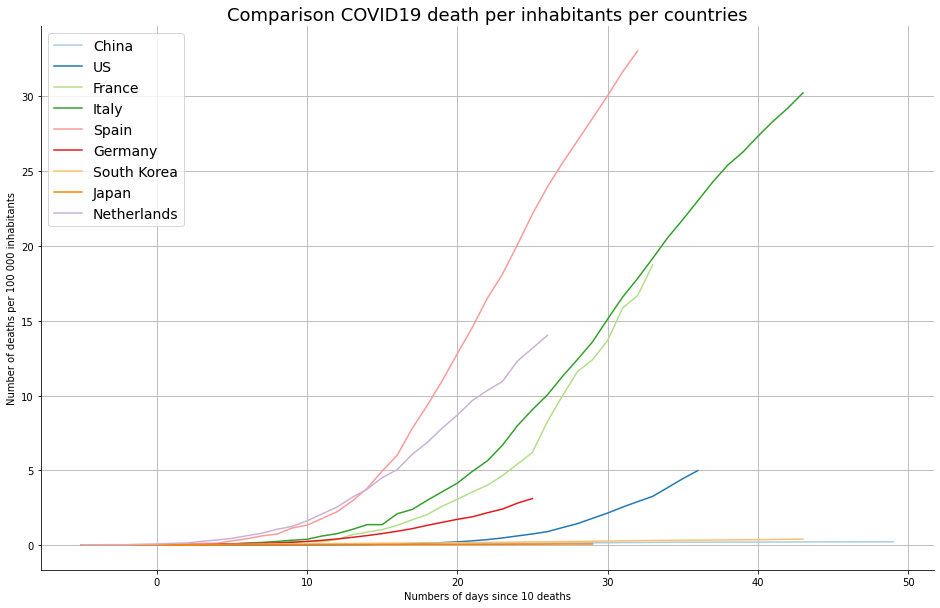

In [10]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since 10 deaths")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 

In [11]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [12]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[range(-5,50),filtered_countries]

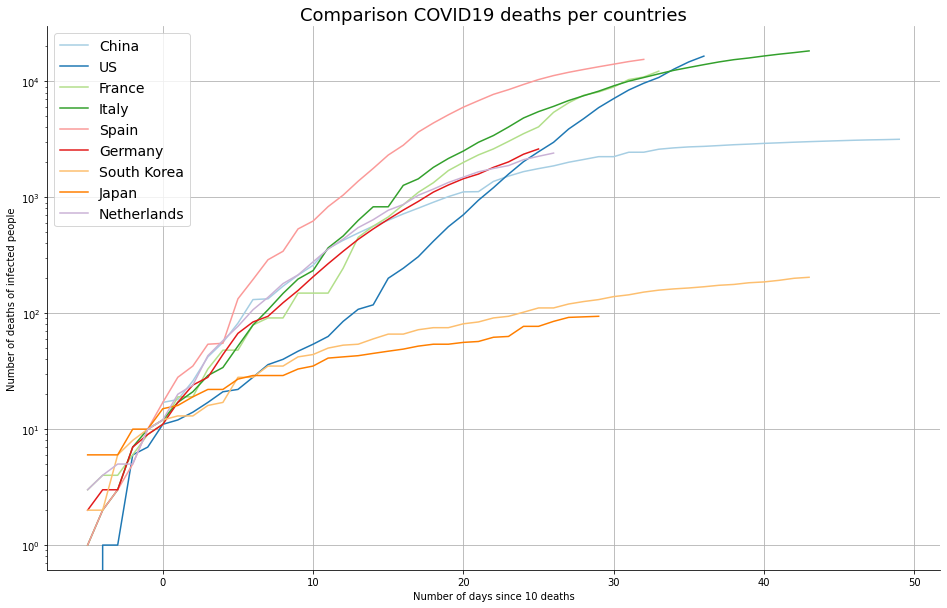

In [13]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison COVID19 deaths per countries", fontsize=18)
plt.xlabel("Number of days since 10 deaths")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("death.png")
plt.show() 

### Derivates of ratio

#### Deaths


In [30]:
df_dynamics_plot_deriv = df_dynamics_vol_plot.diff().rolling(7).mean()

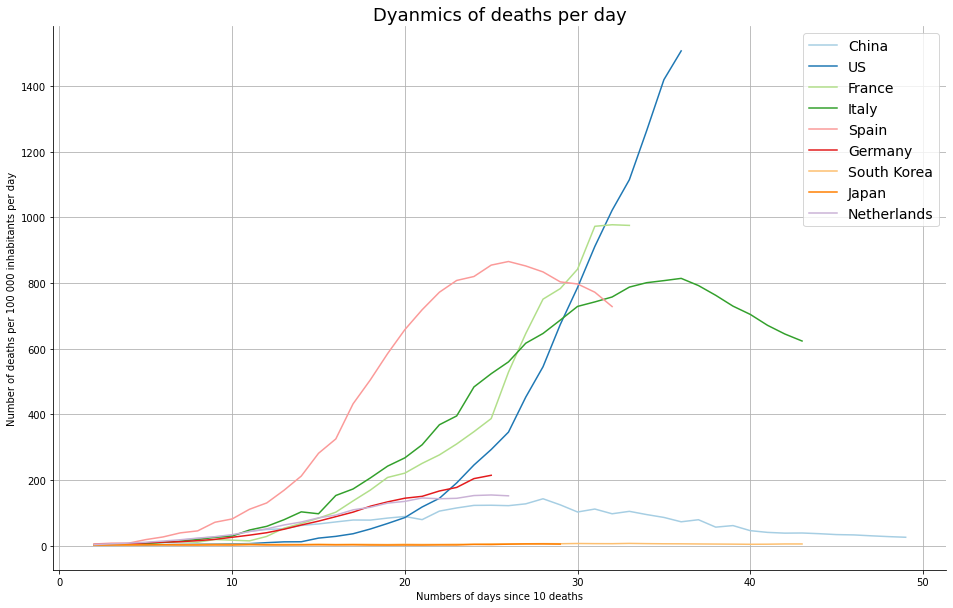

In [32]:
ax_deriv=df_dynamics_plot_deriv.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Dyanmics of deaths per day", fontsize=18)
plt.xlabel("Numbers of days since 10 deaths")
plt.ylabel("Number of deaths per 100 000 inhabitants per day")
plt.legend(fontsize=14)
plt.grid()
ax_deriv.spines['top'].set_visible(False)
ax_deriv.spines['right'].set_visible(False)
plt.savefig("death_ratio_derivative.png")
plt.show() 

## Cases

In [16]:
df_dynamics_cases = df_dataset[['country','ratio','age']].pivot(index='age',columns='country',values='ratio')

In [17]:
df_dynamics_cases_plot = df_dynamics_cases.loc[range(-5,40),filtered_countries]

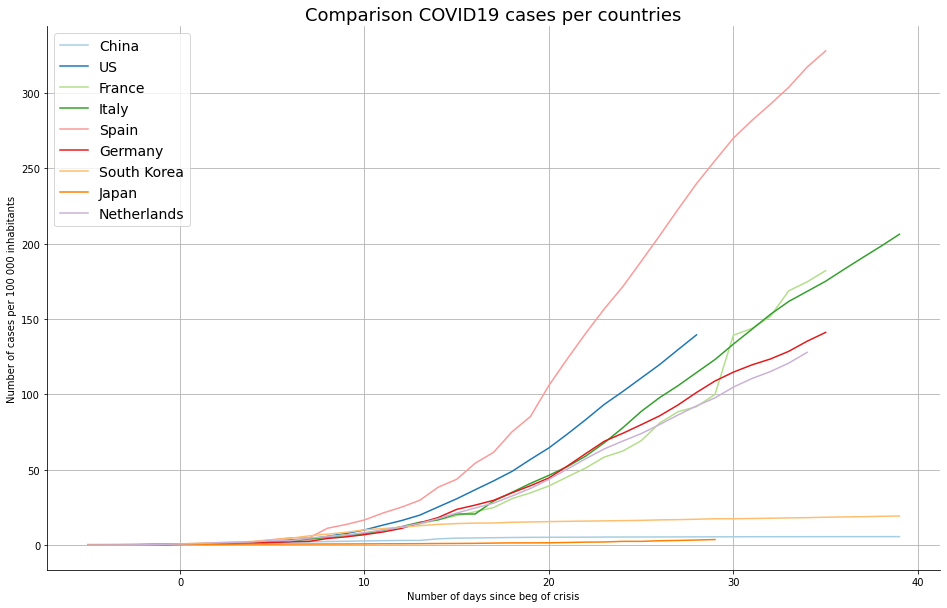

In [18]:
ax_cases=df_dynamics_cases_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 cases per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of cases per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax_cases.spines['top'].set_visible(False)
ax_cases.spines['right'].set_visible(False)
plt.savefig("cases.png")
plt.show() 

In [33]:
df_dynamics_cases_plot_deriv = df_dynamics_cases_plot.diff().rolling(7).mean()

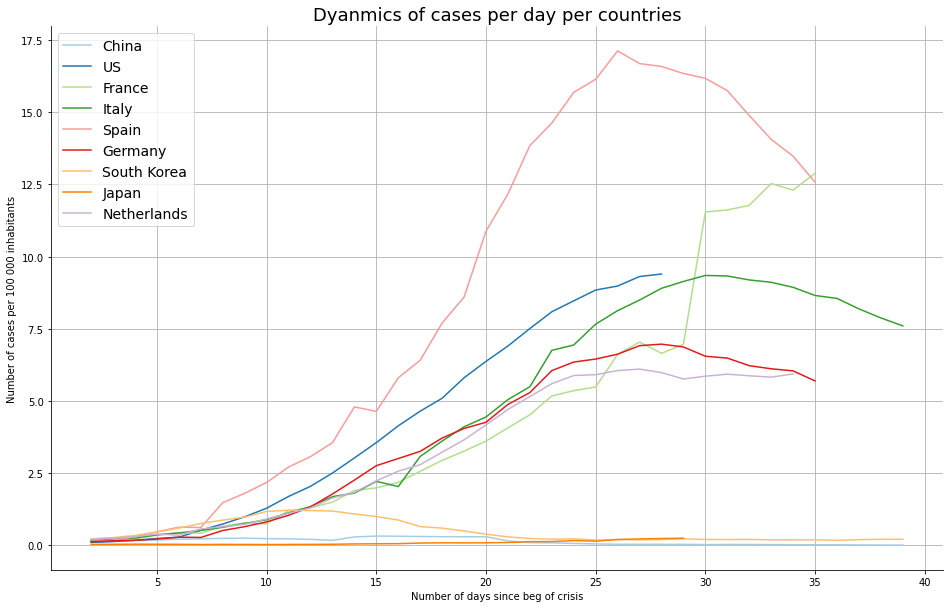

In [36]:
ax_cases_deriv=df_dynamics_cases_plot_deriv.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Dyanmics of cases per day per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of cases per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax_cases_deriv.spines['top'].set_visible(False)
ax_cases_deriv.spines['right'].set_visible(False)
plt.savefig("cases_dynamics.png")
plt.show() 

## Death rate
Should be stable

In [19]:
df_dataset['DR']=df_dataset['death']/df_dataset['case']

In [20]:
df_death_rate_pivot = df_dataset[['country','age_death', 'DR']].pivot(index='age_death',columns='country',values='DR').loc[range(0,50),filtered_countries]

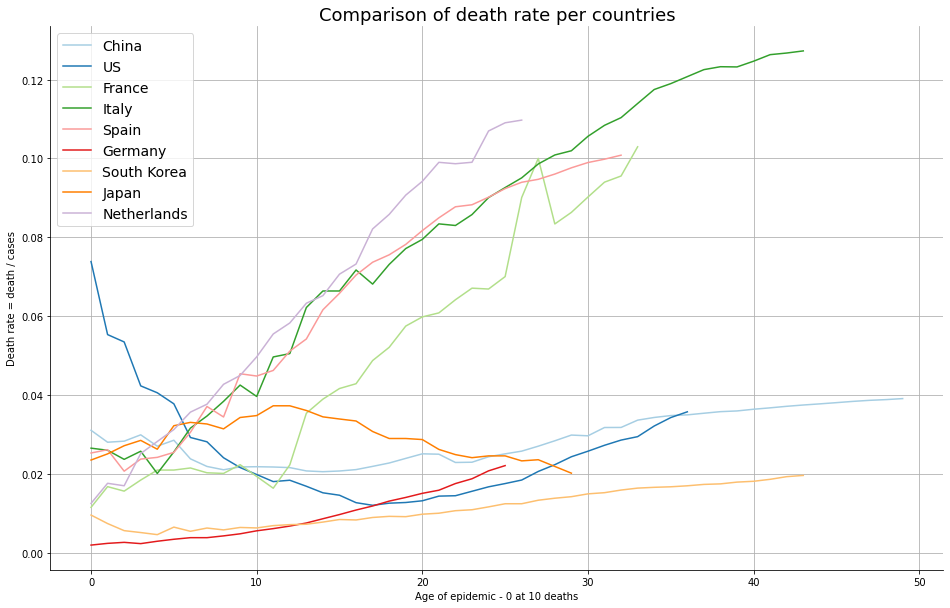

In [21]:
ax_vol=df_death_rate_pivot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison of death rate per countries", fontsize=18)
plt.xlabel("Age of epidemic - 0 at 10 deaths")
plt.ylabel("Death rate = death / cases")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
plt.savefig("death_rate.png")
plt.show() 

## Number of infected people in France

In [22]:
age_max_fr = df_dataset[df_dataset['country'] =='France']['age_death'].max()

### Focus

In [23]:
df_dynamics_plot2 = df_dynamics_t.loc[range(-5,50),['France','Italy','Spain','United Kingdom','Netherlands']]

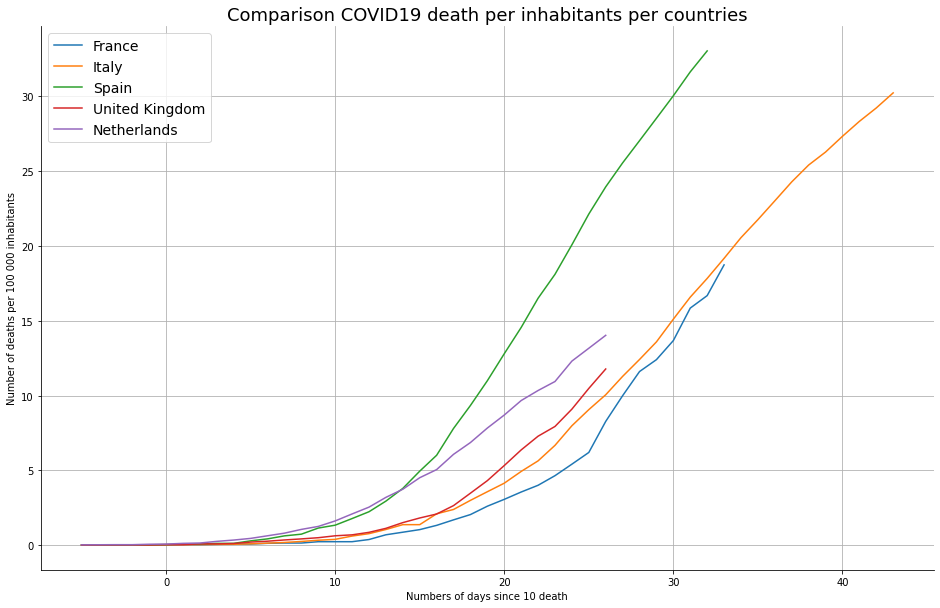

In [24]:
ax2=df_dynamics_plot2.plot(kind='line', figsize=(16,10))
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since 10 death")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 